In [1]:
import requests
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
BTCC_etf = yf.Ticker("BTCC.TO")
BTCC_etf_data = BTCC_etf.history(period="2y")
BTCC_etf_data.to_csv("BTCC_etf_data.csv", index = True)
print(BTCC_etf_data)

                                Open       High        Low      Close  Volume  \
Date                                                                            
2023-01-16 00:00:00-05:00   4.100000   4.200000   4.040000   4.180000  266600   
2023-01-17 00:00:00-05:00   4.190000   4.200000   4.120000   4.190000  299100   
2023-01-18 00:00:00-05:00   4.220000   4.220000   3.980000   4.040000  236900   
2023-01-19 00:00:00-05:00   4.060000   4.140000   4.060000   4.130000   52700   
2023-01-20 00:00:00-05:00   4.150000   4.380000   4.090000   4.370000  132600   
...                              ...        ...        ...        ...     ...   
2025-01-10 00:00:00-05:00  17.520000  17.780001  17.129999  17.580000  636400   
2025-01-13 00:00:00-05:00  16.900000  17.379999  16.549999  17.360001  825600   
2025-01-14 00:00:00-05:00  17.969999  18.040001  17.680000  17.910000  495600   
2025-01-15 00:00:00-05:00  18.320000  18.700001  18.299999  18.490000  737500   
2025-01-16 00:00:00-05:00  1

In [3]:
sp500 = yf.Ticker("SPY")
sp500_data = sp500.history(period="2y")
sp500_data.to_csv("sp500_data.csv", index=True)
print(sp500_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-01-17 00:00:00-05:00  387.543196  389.245165  386.162156  386.852661   
2023-01-18 00:00:00-05:00  388.058617  389.138137  380.540767  380.744995   
2023-01-19 00:00:00-05:00  378.673477  380.346270  376.631138  377.973267   
2023-01-20 00:00:00-05:00  379.393198  385.170169  377.720404  385.014557   
2023-01-23 00:00:00-05:00  385.831467  391.598703  384.858914  389.634155   

                             Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                         
2023-01-17 00:00:00-05:00  62677300        0.0           0.0            0.0  
2023-01-18 00:00:00-05:00  99632300        0.0           0.0            0.0  
2023-01-19 00:00:00-05:00  86958900        0.0           0.0            0.0  
2023-01-20 00:00:00-05:00  91806400        0.0           0.0          

In [4]:
#Comapring with NVDA as it is one of the most hyped up stocks of the time frame and was marked as a good investment and not a crazy gamble
NVDA = yf.Ticker("NVDA")
NVDA_data = NVDA.history(period="2y")
NVDA_data.to_csv("NVDA_data.csv", index=True)
print(len(NVDA_data))
print(NVDA_data)

503
                                 Open        High         Low       Close  \
Date                                                                        
2023-01-17 00:00:00-05:00   16.886717   17.715115   16.886717   17.689133   
2023-01-18 00:00:00-05:00   17.654161   17.860010   17.269440   17.364372   
2023-01-19 00:00:00-05:00   17.023618   17.184502   16.718841   16.752815   
2023-01-20 00:00:00-05:00   16.998635   17.843022   16.812772   17.826035   
2023-01-23 00:00:00-05:00   18.050871   19.231015   17.805052   19.179052   
...                               ...         ...         ...         ...   
2025-01-10 00:00:00-05:00  137.449997  139.919998  134.220001  135.910004   
2025-01-13 00:00:00-05:00  129.990005  133.490005  129.509995  133.229996   
2025-01-14 00:00:00-05:00  136.050003  136.380005  130.050003  131.759995   
2025-01-15 00:00:00-05:00  133.649994  136.449997  131.289993  136.240005   
2025-01-16 00:00:00-05:00  138.699997  138.699997  134.110001  134.60000

In [5]:
#Only care about the open and close as Volume is not comparable due to the BTCC etf being in Canadian stock market and cant directly look at bitcoin volume
spy = pd.read_csv("sp500_data.csv" ,usecols=['Open', "Close",'Date'])
BTCC = pd.read_csv("BTCC_etf_data.csv",usecols=['Open', "Close", 'Date'])
nvda = pd.read_csv("NVDA_data.csv",usecols=['Open', "Close", 'Date'])

In [6]:
#Merging all the data into a joint dataframe
joint = pd.merge(BTCC,spy, on='Date', how='inner')
joint = pd.merge(joint,nvda, on='Date', how='inner')
joint = joint.iloc[:-3]
joint.rename(columns={'Open': 'NVDA Open'}, inplace = True)
joint.rename(columns={'Close': 'NVDA Close'}, inplace = True)
joint.rename(columns={'Open_y': 'SPY Open'}, inplace = True)
joint.rename(columns={'Close_y': 'SPY Close'}, inplace = True)
joint.rename(columns={'Open_x': 'BTCC Open'}, inplace = True)
joint.rename(columns={'Close_x': 'BTCC Close'}, inplace = True)
print(joint.head())

                        Date  BTCC Open  BTCC Close    SPY Open   SPY Close  \
0  2023-01-17 00:00:00-05:00       4.19        4.19  387.543196  386.852661   
1  2023-01-18 00:00:00-05:00       4.22        4.04  388.058617  380.744995   
2  2023-01-19 00:00:00-05:00       4.06        4.13  378.673477  377.973267   
3  2023-01-20 00:00:00-05:00       4.15        4.37  379.393198  385.014557   
4  2023-01-23 00:00:00-05:00       4.48        4.51  385.831467  389.634155   

   NVDA Open  NVDA Close  
0  16.886717   17.689133  
1  17.654161   17.364372  
2  17.023618   16.752815  
3  16.998635   17.826035  
4  18.050871   19.179052  


In [7]:
#Finding the overall return and how it grew through the 2 years
joint['BTCC overall return'] = np.round(((joint.loc[:,'BTCC Close'] - joint.loc[0,'BTCC Close'] )/ joint.loc[0,'BTCC Close'])*100,2)
joint['SPY overall return'] = np.round(((joint.loc[:,'SPY Close'] - joint.loc[0,'SPY Close'])/ joint.loc[0,'SPY Close'])*100,2)
joint['NVDA overall return'] = np.round(((joint.loc[:,'NVDA Close'] - joint.loc[0,'NVDA Close'])/ joint.loc[0,'NVDA Close'])*100,2)
print(joint[['Date','NVDA Close','NVDA overall return']])

                          Date  NVDA Close  NVDA overall return
0    2023-01-17 00:00:00-05:00   17.689133                 0.00
1    2023-01-18 00:00:00-05:00   17.364372                -1.84
2    2023-01-19 00:00:00-05:00   16.752815                -5.29
3    2023-01-20 00:00:00-05:00   17.826035                 0.77
4    2023-01-23 00:00:00-05:00   19.179052                 8.42
..                         ...         ...                  ...
485  2025-01-06 00:00:00-05:00  149.429993               744.76
486  2025-01-07 00:00:00-05:00  140.139999               692.24
487  2025-01-08 00:00:00-05:00  140.110001               692.07
488  2025-01-10 00:00:00-05:00  135.910004               668.32
489  2025-01-13 00:00:00-05:00  133.229996               653.17

[490 rows x 3 columns]


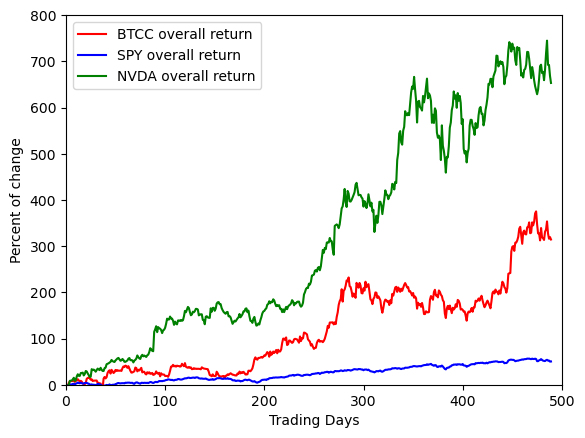

In [8]:
import matplotlib.pyplot as plt
#Plotting the graph viewing the journey each asset took
plt.plot(joint['BTCC overall return'], color = 'r', label = "BTCC overall return")
plt.plot(joint['SPY overall return'],color = 'b', label = "SPY overall return")
plt.plot(joint['NVDA overall return'], color = 'g', label = "NVDA overall return")
plt.xlim(0,500)
plt.ylim(0,800)
plt.xlabel("Trading Days")
plt.ylabel("Percent of change")
plt.legend(loc='upper left')

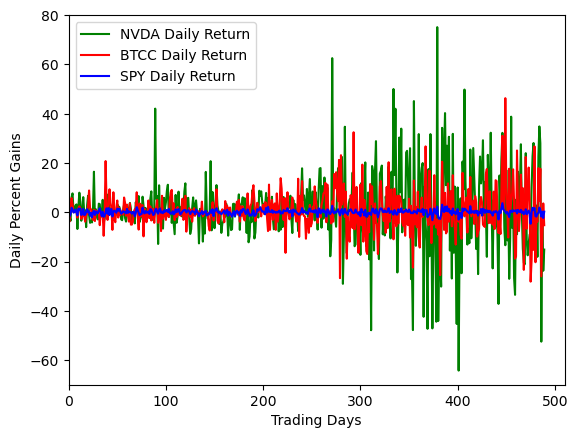

In [9]:
#Calculating the daily returns by finding the difference in the overall returns between the days
joint['Daily Gain BTCC'] = joint['BTCC overall return'].diff().round(2)
joint['Daily Gain SPY'] = joint['SPY overall return'].diff().round(2)
joint['Daily Gain NVDA'] = joint['NVDA overall return'].diff().round(2)
plt.plot(joint['Daily Gain NVDA'], color = 'g', label = 'NVDA Daily Return')
plt.plot(joint['Daily Gain BTCC'], color = 'r', label = 'BTCC Daily Return')
plt.plot(joint['Daily Gain SPY'], color = 'b', label = 'SPY Daily Return')
plt.xlabel("Trading Days")
plt.ylabel('Daily Percent Gains')
plt.xlim(0,510)
plt.ylim(-70,80)
plt.legend()


In [10]:
#Trying to find any patterns or insight in the data of the daily gains of all the stocks
print(joint[["Daily Gain BTCC", "Daily Gain SPY",'Daily Gain NVDA']].describe())

       Daily Gain BTCC  Daily Gain SPY  Daily Gain NVDA
count       489.000000      489.000000       489.000000
mean          0.642781        0.102843         1.335726
std           8.256775        0.999759        14.989381
min         -28.160000       -4.640000       -64.270000
25%          -3.580000       -0.440000        -4.670000
50%           0.000000        0.100000         0.980000
75%           4.060000        0.730000         6.400000
max          46.300000        3.700000        75.120000


In [11]:
#Rolling Vol to see how it changes and the descriptive statistics of the data
joint ['Rolling Vol BTCC'] = joint['Daily Gain BTCC'].rolling(window = 20).std(ddof=1)
joint ['Rolling Vol SPY'] = joint['Daily Gain SPY'].rolling(window = 20).std(ddof=1)
joint ['Rolling Vol NVDA'] = joint['Daily Gain NVDA'].rolling(window = 20).std(ddof=1)
print(joint[['Rolling Vol BTCC','Rolling Vol SPY', 'Rolling Vol NVDA' ]].describe())

       Rolling Vol BTCC  Rolling Vol SPY  Rolling Vol NVDA
count        470.000000       470.000000        470.000000
mean           7.200387         0.952654         12.507782
std            3.815103         0.263986          8.183644
min            1.635679         0.511545          2.323637
25%            3.898569         0.769372          5.317257
50%            6.472064         0.902163         10.121145
75%           10.033148         1.080225         18.551394
max           16.972454         1.822864         32.934284


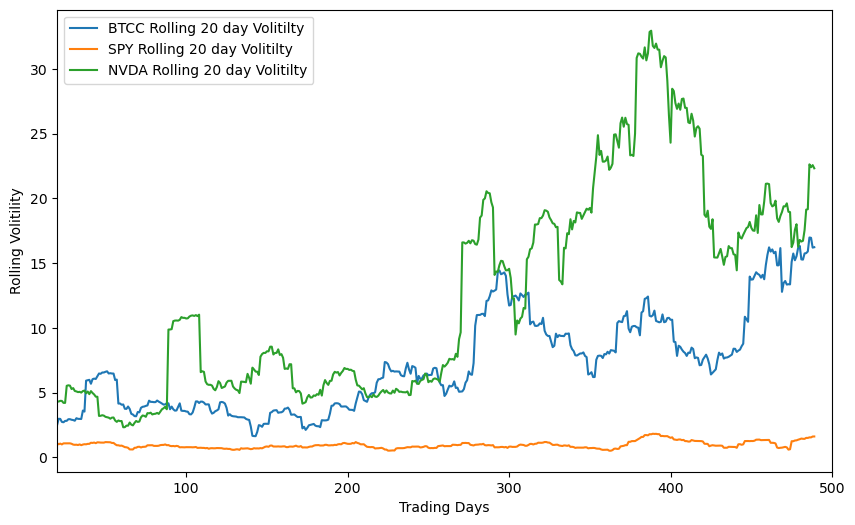

In [56]:
#Plotting the Vol to make it easier to see patterns and varience of the volitilty
plt.figure(figsize=(10, 6))
plt.plot(joint.index, joint["Rolling Vol BTCC"], label="BTCC Rolling 20 day Volitilty")
plt.plot(joint.index, joint["Rolling Vol SPY"], label="SPY Rolling 20 day Volitilty")
plt.plot(joint.index, joint["Rolling Vol NVDA"], label="NVDA Rolling 20 day Volitilty")
plt.xlim(20,500)
plt.xlabel('Trading Days')
plt.ylabel("Rolling Volitility")
plt.legend()

In [13]:
# Correlation between spy and NVDA would not be very insightful as we are comparing sotkcs vs Crypto
correlationBTCCSPY = joint['Daily Gain BTCC'].corr(joint['Daily Gain SPY'])
print('correlation between BTCC and SPY:',correlationBTCCSPY)
correlationBTCCNVDA = joint['Daily Gain NVDA'].corr(joint['Daily Gain BTCC'])
print('correlation between BTCC and NVDA:',correlationBTCCNVDA)

correlation between BTCC and SPY: 0.31551884859693874
correlation between BTCC and NVDA: 0.20498348384790185


In [60]:
#Correlation did not seem to be strong but lets look at a rolling time frame to see if correlation exists and see when correlation is strong.
rolling_corrSPY = joint['Daily Gain BTCC'].rolling(window=7).corr(joint['Daily Gain SPY'])
index = (rolling_corrSPY[rolling_corrSPY>0.85]).index
rolling_sums = joint[['Daily Gain BTCC', 'Daily Gain SPY']].rolling(window=7).sum()
print('Positive Corr SPY,BTCC')
print(rolling_sums.iloc[index].round(2))
index = (rolling_corrSPY[rolling_corrSPY<-0.85]).index
print('Negative Corr SPY,BTCC')
print(rolling_sums.iloc[index].round(2))
rolling_corrNVDA = joint['Daily Gain BTCC'].rolling(window=7).corr(joint['Daily Gain NVDA'])
rolling_sumsN = joint[['Daily Gain BTCC', 'Daily Gain NVDA']].rolling(window=7).sum()
index = (rolling_corrNVDA[rolling_corrNVDA>0.85]).index
print('Positive Corr NVDA,BTCC')
print(rolling_sumsN.iloc[index].round(2))
index = (rolling_corrNVDA[rolling_corrNVDA<-0.85]).index
print('Negative Corr NVDA,BTCC')
print(rolling_sumsN.iloc[index].round(2))
# We wanna see the percantage gains when correlation is strong to see manually if there is a strong correlation

Positive Corr SPY,BTCC
     Daily Gain BTCC  Daily Gain SPY
9               7.64            3.01
11              2.62            2.56
12              4.29            4.17
13              1.31            3.02
14             -0.47            1.28
15             -0.00            2.39
16              0.47            2.53
17             -5.02            0.15
18             -8.59           -0.70
168             2.39           -3.31
169             1.67           -3.69
322            -7.16            3.35
323            -4.30            2.28
324            -3.11            1.83
325            15.28            4.66
326            16.70            5.24
335            34.13            1.57
336            10.26            0.01
337             8.35           -0.66
386           -28.41           -4.50
387           -11.46           -0.25
388           -16.70            2.79
398            -0.00           -0.34
399            -1.67           -0.09
418            21.12            2.82
419            

In [22]:
#Finding what BTCC does when in the rallies of daily gain of 1% and how this affects BTCC price
BTCC_when_spy_up1 = (joint.loc[joint['Daily Gain SPY'] > 1, 'Daily Gain BTCC'])
print(BTCC_when_spy_up1.describe())
BTCC_when_spy_down1 = (joint.loc[joint['Daily Gain SPY'] < -1, 'Daily Gain BTCC'])
print(BTCC_when_spy_down1.describe())

count    87.000000
mean      3.934253
std       7.357084
min      -8.350000
25%      -0.355000
50%       2.630000
75%       6.560000
max      31.030000
Name: Daily Gain BTCC, dtype: float64
count    57.000000
mean     -3.927368
std       9.060130
min     -28.160000
25%      -5.720000
50%      -2.140000
75%       1.070000
max      17.660000
Name: Daily Gain BTCC, dtype: float64


In [21]:
#What bitcoin does when SPY is in a rally, don't need to look at NVDA bc NVDA will be up in the rallies
print(rolling_BTCC[rolling_Short > 0.7])
print('BTCC rolling median',rolling_BTCC.median())
print('BTCC rolling mean',rolling_BTCC.mean())

12     1.336
203    1.646
205    0.262
329    4.081
392    1.169
393    2.983
395    1.289
396    1.814
414    4.153
Name: Daily Gain BTCC, dtype: float64
BTCC rolling median 0.35799999999999976
BTCC rolling mean 0.6671104166666665


In [20]:
rolling_Short = joint['Daily Gain SPY'].rolling(window = 10).mean()
print(rolling_Short[rolling_Short > 0.7])
rolling_BTCC = joint['Daily Gain BTCC'].rolling(window = 10).mean()

12     0.708
203    0.761
205    0.776
329    0.753
392    0.939
393    1.078
395    0.749
396    0.706
414    0.761
Name: Daily Gain SPY, dtype: float64


([<matplotlib.axis.XTick at 0x2257107cb30>,
 [Text(-30, 0, '−30'),
  Text(-25, 0, '−25'),
  Text(-20, 0, '−20'),
  Text(-15, 0, '−15'),
  Text(-10, 0, '−10'),
  Text(-5, 0, '−5'),
  Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35')])

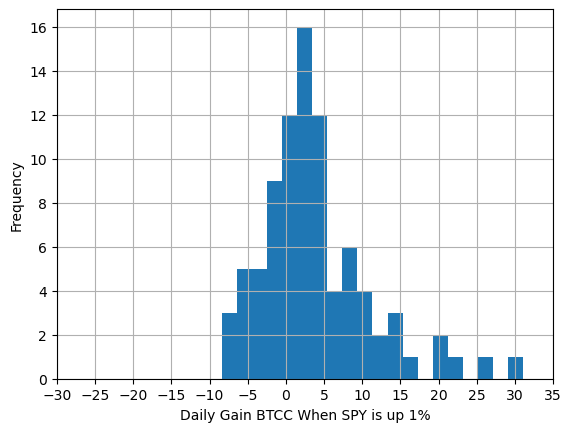

In [23]:
#When SPY is up 1% it seems that BTCC does move up on average a couple of percent around 3-4 showing some positive correlation
BTCC_when_spy_up1.hist(bins = 20)
plt.xlabel('Daily Gain BTCC When SPY is up 1%')
plt.ylabel('Frequency')
plt.xticks(np.arange(-30, 40, step=5))

([<matplotlib.axis.XTick at 0x225708afe60>,
 [Text(-30, 0, '−30'),
  Text(-25, 0, '−25'),
  Text(-20, 0, '−20'),
  Text(-15, 0, '−15'),
  Text(-10, 0, '−10'),
  Text(-5, 0, '−5'),
  Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35')])

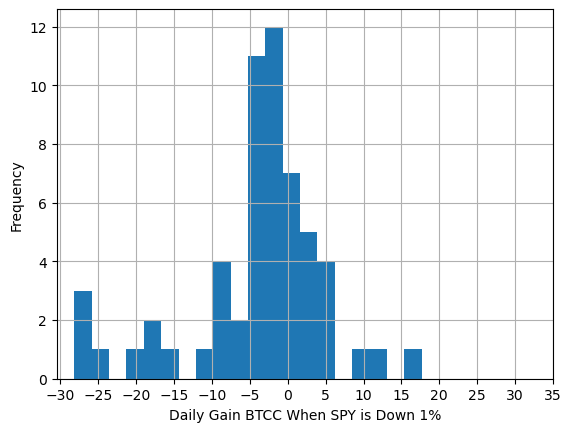

In [24]:
#When SPY moves down BTCC seems to follow the movement on average losing 3-4% proving that they are positively correlated 
BTCC_when_spy_down1.hist(bins = 20)
plt.xlabel('Daily Gain BTCC When SPY is Down 1%')
plt.ylabel('Frequency')
plt.xticks(np.arange(-30, 40, step=5))

In [25]:
#Seeing in more longeterm rallies over the course of a month or 20 trading days shows confirmation to the corelation
rolling_SPYLong = joint['Daily Gain SPY'].rolling(window = 20).sum()
rolling_BTCCLong = joint['Daily Gain BTCC'].rolling(window = 20).sum()
rolling_long = pd.DataFrame({'SPY long Rallies' : rolling_SPYLong[rolling_SPYLong > 10],'BTCC During Rallies' : rolling_BTCCLong[rolling_SPYLong > 10]})
print(rolling_long)

     SPY long Rallies  BTCC During Rallies
212             10.86                19.57
213             11.14                13.84


In [15]:
#wanna calculate beta to see the risk we take when investing in the asset and to make a jusgement if it is worth it
covarience = joint['Daily Gain BTCC'].cov(joint['Daily Gain SPY'])
varience = joint['Daily Gain SPY'].var()
beta = covarience/varience
print('BTCC vs SPY BETA',beta)

BTCC vs SPY BETA 2.6057962103292303


In [16]:
covarience = joint['Daily Gain NVDA'].cov(joint['Daily Gain SPY'])
varience = joint['Daily Gain SPY'].var()
beta = covarience/varience
print('NVDA vs SPY BETA',beta)

NVDA vs SPY BETA 8.475158671126163


In [17]:
covarience = joint['Daily Gain NVDA'].cov(joint['Daily Gain BTCC'])
varience = joint['Daily Gain BTCC'].var()
beta = covarience/varience
print('NVDA vs BTCC BETA',beta)

NVDA vs BTCC BETA 0.3721278228532733


Text(0.5, 1.0, 'BTCC Rolling Beta')

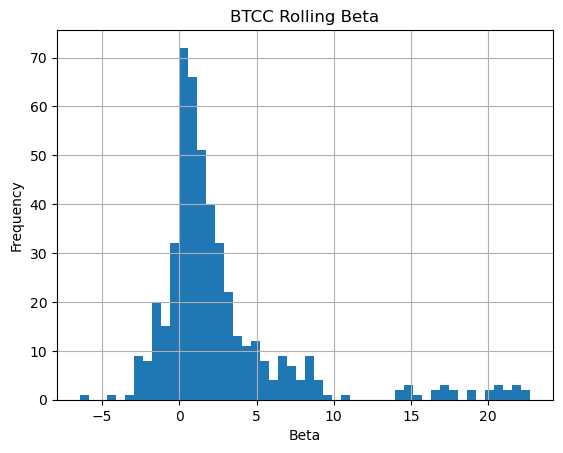

In [62]:
#we are looking on a rolling time frame as if time periods of high uncertantity are only risky than we can invest with that in mind
rolling_betaBTCC = joint['Daily Gain BTCC'].rolling(window=10).cov(joint['Daily Gain SPY']).div(joint['Daily Gain SPY'].var())
hist = rolling_betaBTCC.hist(bins=50)
hist.set_xlabel('Beta')
hist.set_ylabel('Frequency')
hist.set_title('BTCC Rolling Beta')

Text(0.5, 1.0, 'NVDA Rolling Beta')

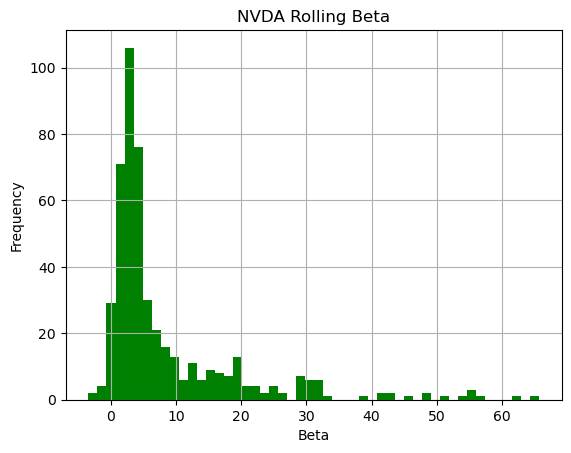

In [64]:
#This confirms the claim that NVDA and SPY are heavily correlated bc NVDA is in the S&P500 so movements in spy are usually led by NVDA
rolling_betaNVDA = joint['Daily Gain NVDA'].rolling(window=10).cov(joint['Daily Gain SPY']).div(joint['Daily Gain SPY'].var())
hist = rolling_betaNVDA.hist(bins=50, color='Green',)
hist.set_xlabel('Beta')
hist.set_ylabel('Frequency')
hist.set_title('NVDA Rolling Beta')

In [26]:
#Sharpe Ratios to see the risk free ratio of all the assets compared to the current ten year treasury yield rate
Ten_year_treasury_yield_rate = 4.77/252
BTCC_Sharpe = (joint["Daily Gain BTCC"].mean() - Ten_year_treasury_yield_rate) / joint["Daily Gain BTCC"].std()
SPY_Sharpe = (joint["Daily Gain SPY"].mean() - Ten_year_treasury_yield_rate) / joint["Daily Gain SPY"].std()
NVDA_Sharpe = (joint["Daily Gain NVDA"].mean() - Ten_year_treasury_yield_rate) / joint["Daily Gain NVDA"].std()
print('BTCC Sharpe:',BTCC_Sharpe, 'SPY Sharpe:',SPY_Sharpe, 'NVDA Sharpe:',NVDA_Sharpe)

BTCC Sharpe: 0.07555645369234659 SPY Sharpe: 0.08393419795992814 NVDA Sharpe: 0.0878486828595863
